<h1><div align="center">Deep Learning From Scratch</div></h1>
<h2><div align="center">Perceptron</div></h2>
<div align="center">Bruno Gonçalves</div>
<div align="center"><a href="http://www.data4sci.com/">www.data4sci.com</a></div>
<div align="center">@bgoncalves, @data4sci</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -n -v -m -p numpy,matplotlib

Tue Jul 02 2019 

CPython 3.7.3
IPython 7.4.0

numpy 1.16.2
matplotlib 3.1.0

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 18.6.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


# Logic functions

Let's start by setting up our training examples. We'll consider the simple 4 point binary example for binary logic

In [4]:
X = np.ones((4, 3), dtype='float')
X[1, 2] = 0
X[2, 1] = 0
X[3, 1] = 0
X[3, 2] = 0

The first column is just the bias, always set to 1.

In [5]:
X

array([[1., 1., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 0.]])

We'll take a look at two examples, *AND* and *OR*

In [6]:
y_AND = [1, 0, 0, 0]
y_OR = [1, 1, 1, 0]

# Prediction and Training

The prediction function is simple. Just predict 1 if the activation value is larger than 0 and 0 otherwise

In [7]:
def predict(weights, inputs):
    return int(np.dot(weights, inputs) > 0)

The training algorithm is also simple:

- If the prediction is correct, do nothing
- If the prediction is wrong, add/subtract the input vector

In [9]:
def train(weights, X, y, epochs = 100):
    for _ in range(epochs):
        for i in range(len(y)):
            inputs = X[i, :]
            label = y[i]
            
            prediction = predict(weights, inputs)
            weights += (label - prediction) * inputs

# Perceptron

In this simple case, our _perceptron_ is just a vector of 3 weights that we initialize to zero

In [10]:
weights_AND = np.zeros(3)
weights_OR = np.zeros(3)

We can train them both quickly

In [11]:
train(weights_AND, X, y_AND)
train(weights_OR, X, y_OR)

And take a look at the resulting weights

In [12]:
weights_AND

array([-2.,  1.,  2.])

In [13]:
weights_OR

array([0., 1., 1.])

# Visualization

Let's define some helper functions. First, one to draw the decision surface

In [15]:
def surface(weights, n=20):
    points = np.linspace(0, 1, n)
    xs = []
    ys = []
    zs = []
    
    for i in range(n):
        x = points[i]
        for j in range(n):
            y = points[j]
            
            point = [1, x, y]
            
            xs.append(x)
            ys.append(y)
            zs.append(np.dot(weights, point))
            
    return np.array(xs), np.array(ys), np.array(zs)

And a function to plot the perceptron output

In [16]:
def plot_output(weights, X, y, level=0, label='AND function'):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    xs, ys, zs = surface(weights)

    colors = np.array(['blue']*xs.shape[0])
    selector = (zs>=-1) & (zs<=1)
    colors[zs>0] = 'red'
    
    ax.scatter(X[:, 1], X[:, 2], y, c='gold', marker='*', s=1000, depthshade=False)
    ax.scatter(xs[selector], ys[selector], zs[selector], c=colors[selector], marker='.')
    grids = np.linspace(0, 1, 6)
    
    for i in range(6):
        ax.plot([0, 1], [grids[i], grids[i]], [level, level], 'darkgray')
        ax.plot([grids[i], grids[i]], [0, 1], [level, level], 'darkgray')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('output')
    ax.set_title(label)

    fig.set_size_inches(11, 11)

## And Function

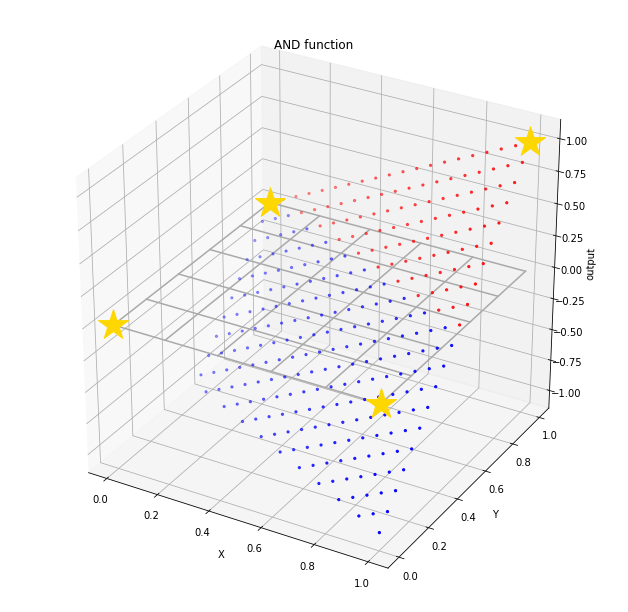

In [17]:
plot_output(weights_AND, X, y_AND, 0, 'AND function')

## OR function

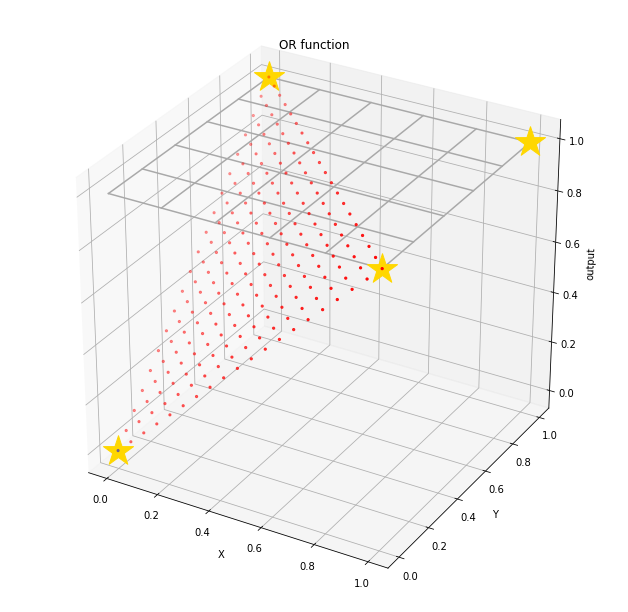

In [18]:
plot_output(weights_OR, X, y_OR, 1, 'OR function')